## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [30]:
housing = pd.read_csv('housing.csv')
housing = pd.get_dummies(housing, columns = ['ocean_proximity'])

X = housing.drop(columns = ['median_house_value'])
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40028922)

regra_1 = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 9)
regra_1.fit(X_train, y_train)

mse_test = regra_1.score(X_test, y_test)
mse_test

0.6972144453761154

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [33]:
path = regra_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.25800775e+04, 3.96923834e+04, 4.17776859e+04,
        1.42599672e+05, 1.59078074e+05, 1.76731051e+05, 1.84755647e+05,
        2.18396312e+05, 2.86580325e+05, 2.96713523e+05, 3.09948548e+05,
        3.18179606e+05, 3.40658452e+05, 3.50879618e+05, 3.52805286e+05,
        3.77220524e+05, 4.24660283e+05, 4.43051147e+05, 4.74006313e+05,
        7.39955379e+05, 7.49123613e+05, 7.65874484e+05, 7.91318744e+05,
        8.71426633e+05, 8.82753981e+05, 8.91111265e+05, 9.56696075e+05,
        9.82700440e+05, 1.00725476e+06, 1.07868127e+06, 1.10171004e+06,
        1.12283017e+06, 1.15368924e+06, 1.16949825e+06, 1.18282264e+06,
        1.20890494e+06, 1.28653531e+06, 1.31952224e+06, 1.35321304e+06,
        1.44602394e+06, 1.46307310e+06, 1.46769216e+06, 1.48347321e+06,
        1.56004839e+06, 1.60291402e+06, 1.64662822e+06, 1.64740731e+06,
        1.73410414e+06, 1.73489293e+06, 1.91134268e+06, 1.96742227e+06,
        1.97943137e+06, 2.01428045e+06, 2.05042199

In [35]:
# Rapaaaz... complexo em?

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

Text(0, 0.5, 'Grau de impureza total')

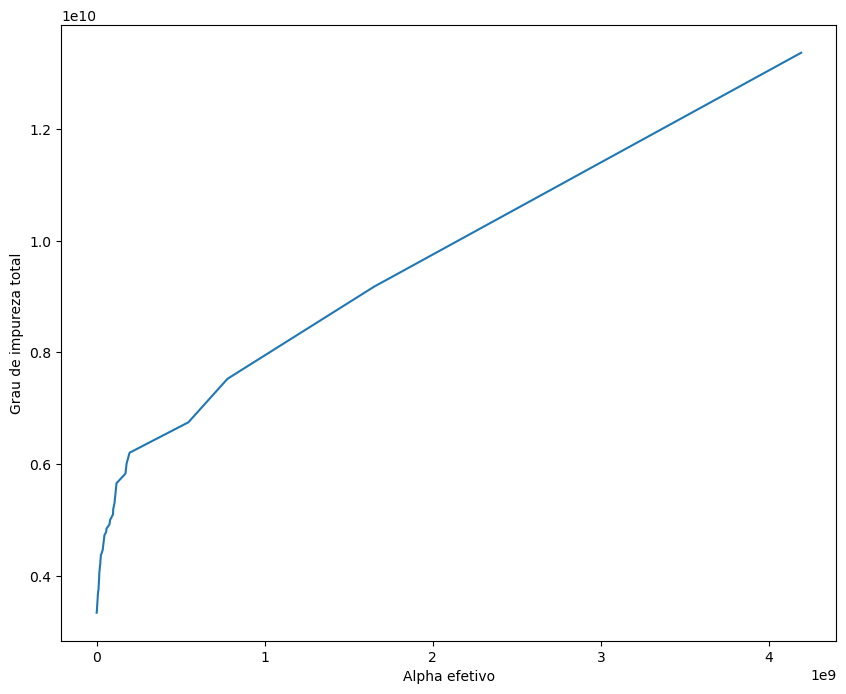

In [38]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize = (10,8))
plt.plot(ccp_alphas, impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Grau de impureza total')


In [39]:
#Ao olhar pro nosso gráfico, um alpha que nos parece particularmente efetivo seria um que estivesse em torno de 0.3... visto que neste trecho, um
#pequeno aumento da complexidade e parece estar no ponto satisfatório para evitar o overlifting...

In [42]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 40028922, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)



### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [44]:
print('ué')
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]
print('uai')

ué
uai


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha do conjunto de treino e teste')
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker = 'o', label = 'treino', drawstyle = 'steps-post')
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker = 'o', label = 'teste', drawstyle = 'steps-post')
ax.legend()
plt.show()

# O que queremos aqui, é um MSE que seja baixo, mas que, no entando, não seja baixo apenas para o conjunto de treino, enquanto o conjunto de testes
# apresenta erros altos. Ou seja, queremos o ponto que possua duas características simultâneas:
# 1. Menor MSE
# 2. MSE de Treino e MSE de Teste o mais próximos possível... 
# O gráfico no começo parece estar muito confuso, mas o nosso MSE desejado parece estar
# em torno de um terço de 0.25*10^9

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [64]:
regra_1 = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 9, ccp_alpha = (.25/3)*10**9)
regra_1.fit(X_train, y_train)

mse_test = regra_1.score(X_test, y_test)
print(mse_test)

# dados_arvore = tree.export_graphviz(regra_2, out_file=None, feature_names=X.columns, filled=True)

0.6019713094295416


### 7. Visualize esta árvore.

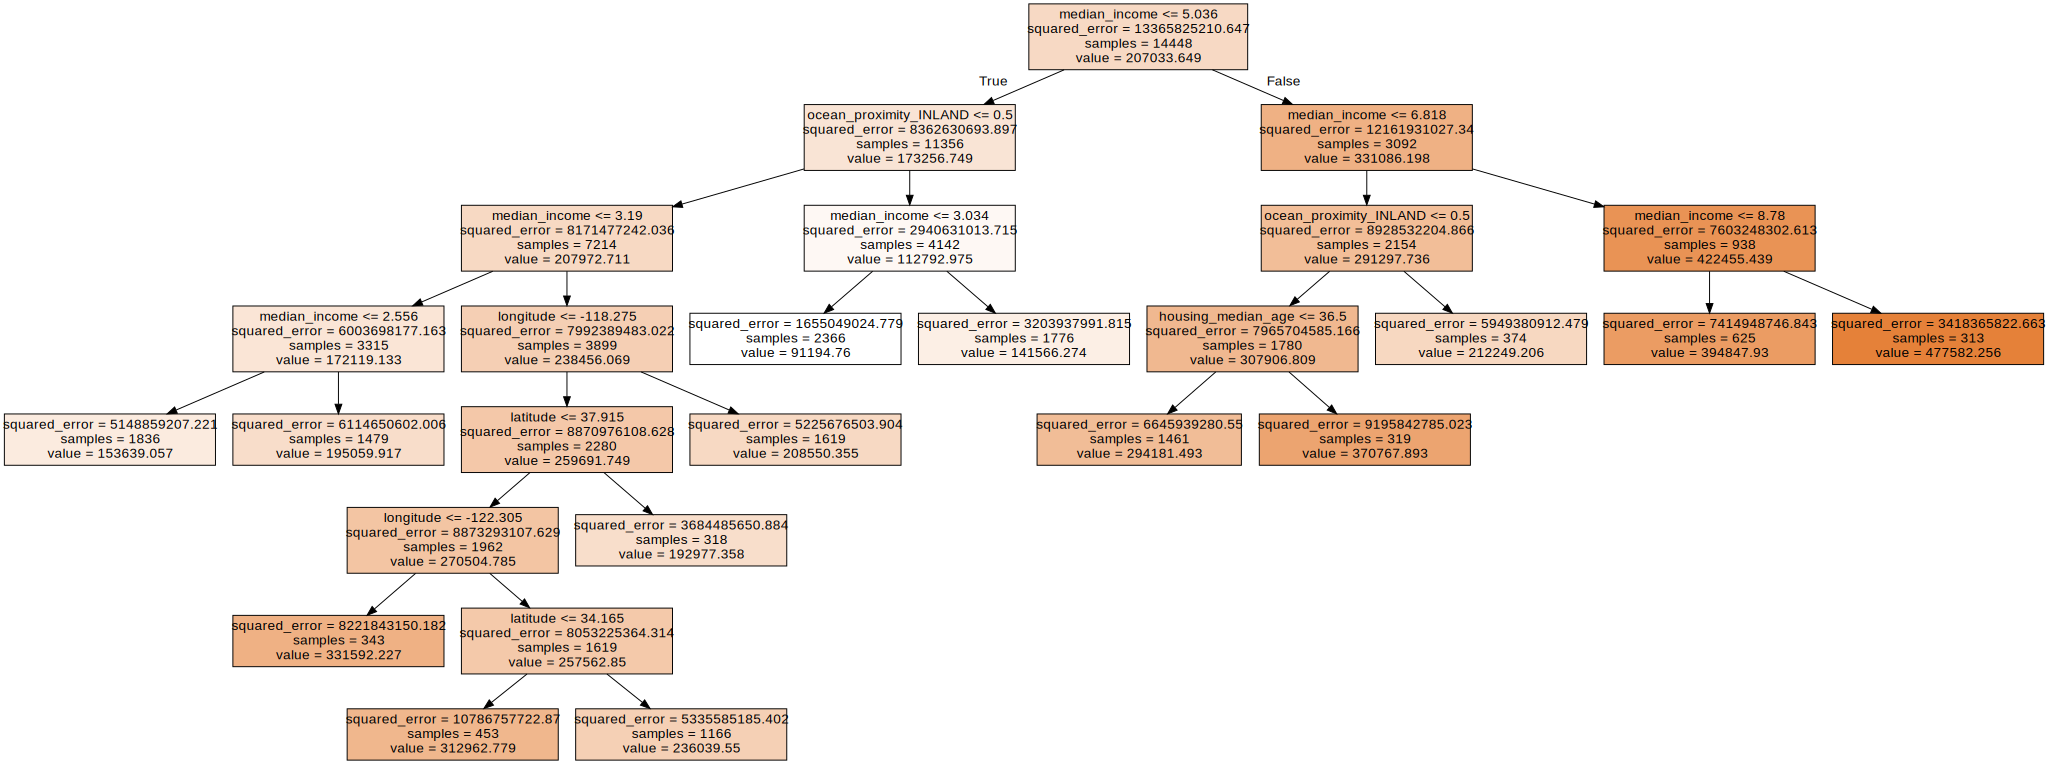

In [72]:
dados_arvore = tree.export_graphviz(regra_1, out_file=None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dados_arvore, format = 'png')
graph